In [1]:
import flylib as flb
#from thllib import flylib as flb
import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
from flylib import util
import figurefirst as fifi
import scipy.signal
#import local_project_functions as lpf
from IPython.display import SVG,display
import pandas as pd

In [2]:
import networkx as nx

In [3]:
fly_nums = range(1600, 1608) + range(1609, 1611) + range(1613, 1614) + range(1615, 1617) + range(1617, 1618) + range(1619, 1620) 

#+ range(1595, 1596) 
#fly_nums = range(1609, 1614)
multi_fly_df = util.construct_multi_fly_df(fly_nums)

all_stim_df = multi_fly_df

Making dataframe for fly number 1600
Making dataframe for fly number 1601
Making dataframe for fly number 1602
Making dataframe for fly number 1603
Making dataframe for fly number 1604
Making dataframe for fly number 1605
Making dataframe for fly number 1606
Making dataframe for fly number 1607
Making dataframe for fly number 1609
Making dataframe for fly number 1610
Making dataframe for fly number 1613
Making dataframe for fly number 1615
Making dataframe for fly number 1616
Making dataframe for fly number 1617
Making dataframe for fly number 1619


In [4]:
print(multi_fly_df.columns.values)
print(np.unique(multi_fly_df['stimulus']))

idx = (multi_fly_df['stimulus']=='cl_blocks, g_x=-1, g_y=0, b_x=-8, b_y=0, ch=True')& \
        ((multi_fly_df['amp_diff']>0.1)&(multi_fly_df['amp_diff']<0.104))


# double_filtered_df = multi_fly_df.loc[idx]
# print(double_filtered_df)

['t' 'stimulus' 'amp_diff' 'left_amp' 'right_amp' 'fly_num' 'wbf'
 'experimental_condition' 'pr_left' 'tpd_left' 'nm_left' 'iii1_left'
 'iii3_left' 'i2_left' 'hg2_left' 'hg3_left' 'hg1_left' 'i1_left'
 'bkg_left' 'b1_left' 'b2_left' 'b3_left' 'iii24_left' 'hg4_left'
 'pr_right' 'tpd_right' 'nm_right' 'iii1_right' 'iii3_right' 'i2_right'
 'hg2_right' 'hg3_right' 'hg1_right' 'i1_right' 'bkg_right' 'b1_right'
 'b2_right' 'b3_right' 'iii24_right' 'hg4_right']
['cl_stripe, g_x = -1, g_y=0, b_x =0, b_y = 0, ch=0'
 'ol_stripe, g_x=-70, g_y=0, b_x=0, b_y=0, ch=0'
 'ol_stripe, g_x=70, g_y=0, b_x=0, b_y=0, ch=0'
 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'pretrial_stripe_fix'
 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'trials_ended' 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'
 'yaw_right, g_x=12, g_y=0, b_x=0, b_y

In [5]:
#print(filtered_df[key+'_right'])

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


In [6]:
yaw_left= multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_left, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
yaw_right= multi_fly_df.loc[multi_fly_df['stimulus']== 'yaw_right, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 

In [7]:
pitch_up =  multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_clockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
pitch_down =  multi_fly_df.loc[multi_fly_df['stimulus']== 'roll_counterclockwise_actually_pitch, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 

In [8]:
roll_cw =  multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_up_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 
roll_ccw =  multi_fly_df.loc[multi_fly_df['stimulus']== 'pitch_down_actually_roll, g_x=12, g_y=0, b_x=0, b_y=0, ch=0'] 

In [9]:
ol_stripe_left = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_stripe, g_x=-70, g_y=0, b_x=0, b_y=0, ch=0']
ol_stripe_right = multi_fly_df.loc[multi_fly_df['stimulus']== 'ol_stripe, g_x=70, g_y=0, b_x=0, b_y=0, ch=0']
stripe_fix = multi_fly_df.loc[multi_fly_df['stimulus']== 'pretrial_stripe_fix']

In [10]:
#no kinematics filtering, but filtering for 'test' segment

pitch_down_WS_decrease = pitch_down.loc[((pitch_down['experimental_condition']=='condition=test'))]

pitch_up_WS_increase = pitch_up.loc[((pitch_up['experimental_condition']=='condition=test'))]

roll_cw_right_increase = roll_cw.loc[((roll_cw['experimental_condition']=='condition=test'))]

roll_ccw_left_increase = roll_ccw.loc[((roll_ccw['experimental_condition']=='condition=test'))]

yaw_right_right_increase = yaw_right.loc[((yaw_right['experimental_condition']=='condition=test'))]

yaw_left_left_increase = yaw_left.loc[((yaw_left['experimental_condition']=='condition=test'))]

In [11]:
#print(filtered_df[key+'_right'])

#flynumbers = list(range(1389,1402))
#flynumbers = list(range(1548,1549))
#flylist = [flb.NetFly(fnum,rootpath='/media/imager/FlyDataD/FlyDB/') for fnum in flynumbers]
#l = [fly.open_signals() for fly in flylist]
#fly = flylist[4]
#fly.open_signals()
fly = flb.NetFly(1556)
fly.open_signals()

general_sorted_keys = sorted(fly.ca_cam_left_model_fits.keys())
#print(sorted(fly.ca_cam_left_model_fits.keys()))

sorted_keys = []

for key in general_sorted_keys:
    key2= key+'_right'
    key3= key+'_left'
    sorted_keys.append(key2)
    sorted_keys.append(key3)
    
print(sorted_keys)

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'bkg_right', 'bkg_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii24_right', 'iii24_left', 'iii3_right', 'iii3_left', 'nm_right', 'nm_left', 'pr_right', 'pr_left', 'tpd_right', 'tpd_left']


In [12]:
cull_list = [('left', 'bkg'),('right', 'bkg'),
            ('left', 'iii24'),('right', 'iii24'),
            ('left', 'nm'),('right', 'nm'),
            ('left', 'pr'),('right', 'pr'),
            ('left', 'tpd'),('right', 'tpd')]

#[sorted_keys.remove(cull) for cull in cull_list]

for cull in cull_list:
    sorted_keys.remove(cull[1]+'_'+cull[0])

    
fly_averages= []
fly_less_filtered = []

i = 0
    
for flynum in fly_nums:
    df=(pitch_down_WS_decrease.loc[pitch_down_WS_decrease['fly_num']==flynum])
    #df_base = (all_stim_df.loc[all_stim_df['fly_num'] == flynum])
    state_mtrx = np.vstack([df[key] for key in sorted_keys])
    average_activity = np.mean(state_mtrx,axis = 1)[:,None]
    #state_mtrx_base = np.vstack([df_base[key] for key in sorted_keys])
    centered_mtrx = state_mtrx - np.mean(state_mtrx,axis = 1)[:,None]
    centered_mean = np.mean(centered_mtrx,axis = 1)[:,None]
    std_mtrx = centered_mtrx/np.std(centered_mtrx,axis = 1)[:,None]
    centered_std_mean = np.mean(std_mtrx,axis = 1)[:,None]
    fly_averages.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_standard_means':
        centered_std_mean})
    fly_less_filtered.append({'fly': flynum, 'Muscles': sorted_keys, 'centered_means':
        centered_mean})
    if i ==0:
        st_mtx = state_mtrx
        std_matrx_tosave = std_mtrx
        
    i += 1
    
pitch_down_means_activity_df = pd.DataFrame(fly_averages)  
pitch_down_means_activity_df_2 = pd.DataFrame(fly_less_filtered)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in divide


In [161]:
#muscle_activity = pd.DataFrame(std_matrx_tosave)

In [13]:
pitch_down_means_activity_df_2

,Muscles,centered_means,fly
0,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[5.39963391597e-16], [-2.66475440009e-16], [0...",1600
1,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[7.04757413707e-16], [2.10375347375e-16], [-1...",1601
2,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[8.41812941293e-17], [-4.52474455945e-16], [-...",1602
3,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[-3.15796771449e-16], [-5.05274834318e-16], [...",1603
4,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[-3.25840603677e-16], [3.50366240513e-16], [2...",1604
5,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[2.52388144917e-16], [2.8043127213e-17], [-1....",1605
6,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[-2.61494154023e-16], [-1.26238557115e-16], [...",1606
7,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[4.9682788405e-16], [-2.68129334249e-16], [1....",1607
8,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[1.26178510235e-16], [2.99673961808e-16], [-7...",1609
9,"[b1_right, b1_left, b2_right, b2_left, b3_righ...","[[7.87741392195e-17], [-1.614869854e-16], [-1....",1610


In [14]:
### do a nicer job organizing this dataframe

mean_of_means = np.mean(pitch_down_means_activity_df['centered_standard_means'])

muscles = pitch_down_means_activity_df['Muscles'][0]

#d= pd.DataFrame()

b = 'basalare'
i = 'first_axillary'
iii = 'third_axillary'
h = 'hgs'

#d = pd.DataFrame(mean_of_means)
#d['averages_muscle_activity']= mean_of_means

averages_muscle = pd.Series(mean_of_means.flatten())

print(muscles)

wing_list = ['right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left', 'right', 'left']
sclerite_group = [b, b, b, b, b, b, h, h, h, h, h, h, h, h, i, i, i, i, iii, iii, iii, iii]
muscle_number = [1, 1, 2, 2, 3, 3, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, 2, 1, 1, 3, 3]
muscle_number_landr = [1, -1, 2, -2, 3, -3, 1, -1, 2, -2, 3, -3, 4, -4, 1, -1, 2, -2, 1, -1, 3, -3]
sclerite_group_number = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4]
muscles = list(muscles)

d = {'averages_muscle_activity': averages_muscle, 'wing_list': wing_list, 'sclerite_group': sclerite_group, 'muscle_number': muscle_number, 'muscles': muscles , 'sclerite_group_number': sclerite_group_number, 'muscle_number_landr': muscle_number_landr  }

pitch_down_new_df = pd.DataFrame(d)
pitch_down_new_df.head()

['b1_right', 'b1_left', 'b2_right', 'b2_left', 'b3_right', 'b3_left', 'hg1_right', 'hg1_left', 'hg2_right', 'hg2_left', 'hg3_right', 'hg3_left', 'hg4_right', 'hg4_left', 'i1_right', 'i1_left', 'i2_right', 'i2_left', 'iii1_right', 'iii1_left', 'iii3_right', 'iii3_left']


,averages_muscle_activity,muscle_number,muscle_number_landr,muscles,sclerite_group,sclerite_group_number,wing_list
0,-4.695920e-16,1,1,b1_right,basalare,1,right
1,-4.637694e-16,1,-1,b1_left,basalare,1,left
2,NaN,2,2,b2_right,basalare,1,right
3,1.918408e-17,2,-2,b2_left,basalare,1,left
4,1.625574e-16,3,3,b3_right,basalare,1,right


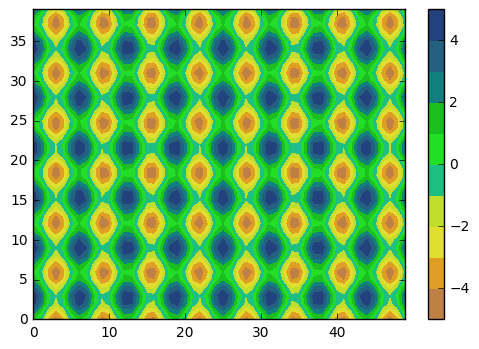

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-25, 25)
y = np.arange(-20, 20)
x2d, y2d = np.meshgrid(x, y)
vals = (3 * np.cos(x2d)) + (2 * np.sin(y2d))

colours = ['#bf8046', '#df9f24', '#e0de30', '#c1de2d', '#1ebf82',
           '#23de27', '#1dbe20', '#11807f', '#24607f', '#22427e']
levels = range(-5, 6)

plt.contourf(vals, levels=levels, colors=colours)
plt.colorbar()
plt.show()

In [15]:
colours = ['#bf8046', '#df9f24', '#e0de30', '#c1de2d', '#1ebf82',
           '#23de27', '#1dbe20', '#11807f', '#24607f', '#22427e']

#min = pitch_down_new_df['averages_muscle_activity'].min
#max = pitch_down_new_df['averages_muscle_activity'].max
max = pitch_down_new_df.loc[pitch_down_new_df['averages_muscle_activity'].idxmax()]
min = pitch_down_new_df.loc[pitch_down_new_df['averages_muscle_activity'].idxmin()]
print(min)
#min= min['averages_muscle_activity']
#max= min['averages_muscle_activity']
levels = range(int(min['averages_muscle_activity']), int(max['averages_muscle_activity']))

#plt.contourf(vals, levels=levels, colors=colours)
vals = pitch_down_new_df['averages_muscle_activity']


#viridisBig = cm.get_cmap('viridis', 512)
#newcmp = ListedColormap(viridisBig(np.linspace(0.25, 0.75, 256)))
#plot_examples([viridis, newcmp])

averages_muscle_activity   -4.69592e-16
muscle_number                         1
muscle_number_landr                   1
muscles                        b1_right
sclerite_group                 basalare
sclerite_group_number                 1
wing_list                         right
Name: 0, dtype: object


In [54]:
#list(pitch_down_new_df['averages_muscle_activity'])

In [17]:
min= int(min['averages_muscle_activity'])
max= int(max['averages_muscle_activity'])

In [16]:
Min = min['averages_muscle_activity']
Max =max['averages_muscle_activity']

In [17]:
print(Min*(10^1600000000000000))
print(Max*(10^1600000000000000))

-0.751347166847
0.260091895153


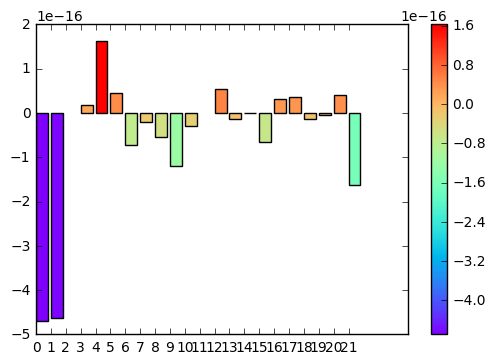

In [139]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(22)
y = list(pitch_down_new_df['averages_muscle_activity'])#*(10^160))
c = list(pitch_down_new_df['averages_muscle_activity'])#*(10^160))
df = pd.DataFrame({"x":x,"y":y,"c":c})

cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap(norm(df.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

/usr/lib/python2.7/dist-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


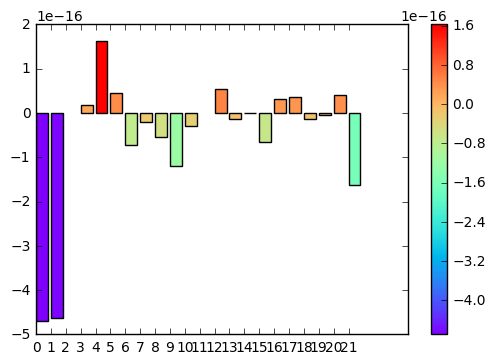

In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(22)
y = list(pitch_down_new_df['averages_muscle_activity'])#*(10^160))
c = list(pitch_down_new_df['averages_muscle_activity'])#*(10^160))
df = pd.DataFrame({"x":x,"y":y,"c":c})

cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap(norm(df.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()

In [19]:

layout = fifi.FigureLayout('activity_heatmap_layout.svg',make_mplfigures = True)

#[:,::-1]
sclerite_1 =pitch_down_new_df.loc[(pitch_down_new_df['sclerite_group_number'] == 1)]
scl_1_m =list(sclerite_1['averages_muscle_activity'])
row_1 = [[scl_1_m[5], scl_1_m[3], scl_1_m[1], scl_1_m[0], scl_1_m[2], scl_1_m[4]]]

sclerite_2 =pitch_down_new_df.loc[(pitch_down_new_df['sclerite_group_number'] == 2)]
scl_2_m =list(sclerite_2['averages_muscle_activity'])
row_2 = [[scl_2_m[7], scl_2_m[5], scl_2_m[3], scl_2_m[1], scl_2_m[0], scl_2_m[2], scl_2_m[4], scl_2_m[6]]]

sclerite_3 =pitch_down_new_df.loc[(pitch_down_new_df['sclerite_group_number'] == 2)]
scl_3_m =list(sclerite_3['averages_muscle_activity'])
row_3 = [[scl_3_m[3], scl_3_m[1], scl_3_m[0], scl_3_m[2]]]

sclerite_4 =pitch_down_new_df.loc[(pitch_down_new_df['sclerite_group_number'] == 2)]
scl_4_m =list(sclerite_4['averages_muscle_activity'])
row_4 = [[scl_4_m[3], scl_4_m[1], scl_4_m[0], scl_4_m[2]]]

full_matrix = [[scl_1_m[5], scl_1_m[3], scl_1_m[1], scl_1_m[0], scl_1_m[2], scl_1_m[4]], [scl_3_m[3], scl_3_m[1], scl_3_m[0], scl_3_m[2]],  [scl_4_m[3], scl_4_m[1], scl_4_m[0], scl_4_m[2]], [scl_2_m[7], scl_2_m[5], scl_2_m[3], scl_2_m[1], scl_2_m[0], scl_2_m[2], scl_2_m[4], scl_2_m[6]]]   

full_matrix_2 = [[np.nan, scl_1_m[5], scl_1_m[3], scl_1_m[1], scl_1_m[0], scl_1_m[2], scl_1_m[4], np.nan], [np.nan, np.nan, scl_3_m[3], scl_3_m[1], scl_3_m[0], scl_3_m[2], np.nan, np.nan],  [np.nan, np.nan, scl_4_m[3], scl_4_m[1], scl_4_m[0], scl_4_m[2], np.nan, np.nan], [scl_2_m[7], scl_2_m[5], scl_2_m[3], scl_2_m[1], scl_2_m[0], scl_2_m[2], scl_2_m[4], scl_2_m[6]]]   

##layout.axes['ind_transition_1'].pcolor(tmtrx_ind_1[:,::-1].T,cmap = plt.cm.viridis)

In [20]:
full_matrix_2 = [[np.nan, scl_1_m[5], scl_1_m[3], scl_1_m[1], scl_1_m[0], scl_1_m[2], scl_1_m[4], np.nan],
                [np.nan, np.nan, scl_3_m[3], scl_3_m[1], scl_3_m[0], scl_3_m[2], np.nan, np.nan],  
                [np.nan, np.nan, scl_4_m[3], scl_4_m[1], scl_4_m[0], scl_4_m[2], np.nan, np.nan], 
                [scl_2_m[7], scl_2_m[5], scl_2_m[3], scl_2_m[1], scl_2_m[0], scl_2_m[2], scl_2_m[4], scl_2_m[6]]]   


In [ ]:
from sklearn.preprocessing import normalize

#from sklearn.preprocessing import normalize
#foo[:, [-1]] = normalize(foo[:, -1, None], norm='max', axis=0)
from sklearn.preprocessing import normalize
full_matrix_2[:, [-1]] = normalize(full_matrix_2[:, -1, None], norm='max', axis=0)

In [35]:
#norm(full_matrix_2)

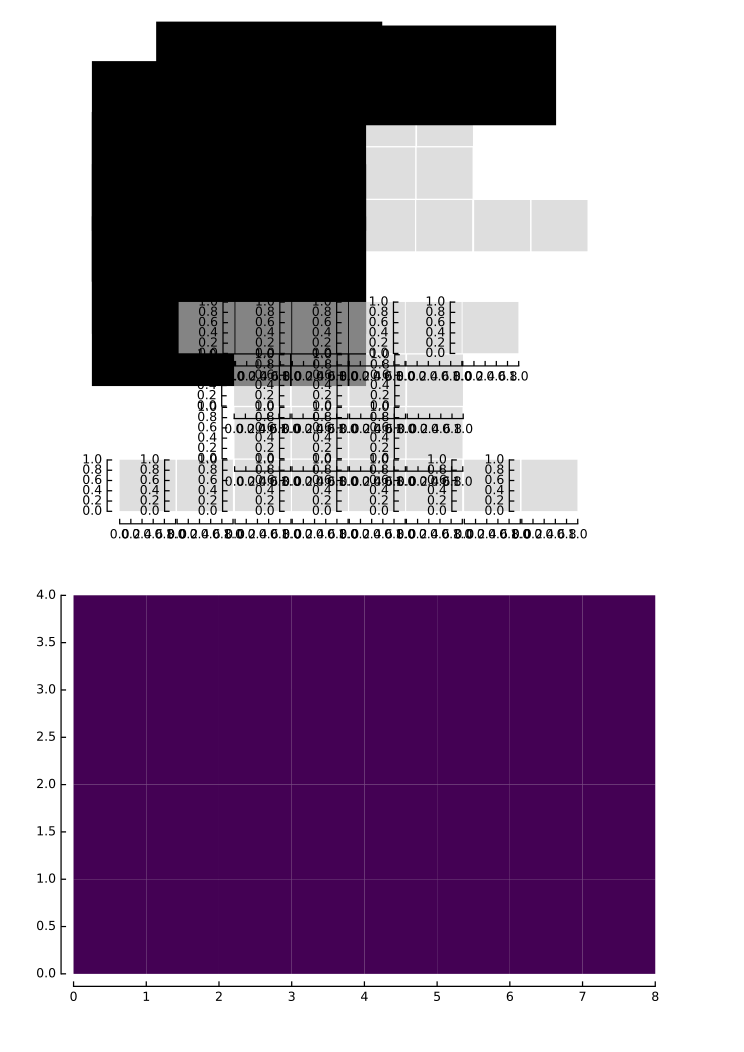

In [36]:
layout = fifi.FigureLayout('activity_heatmap_layout.svg',make_mplfigures = True)

#cmap = plt.cm.rainbow
#norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

#fig, ax = plt.subplots()
#ax.bar(df.x, df.y, color=cmap(norm(df.c.values)))
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

layout.axes['heat_map'].pcolor((full_matrix_2),cmap = plt.cm.viridis) #, color=cmap(norm(full_matrix_2)))#cmap = plt.cm.rainbow)#)#cmap = plt.cm.viridis)  #[:,::-1].T

#norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

fifi.mpl_functions.set_spines(layout)
layout.save('activity_matrx.svg')
plt.close('all')
display(SVG('activity_matrx.svg'))

In [174]:
color=cmap(norm(df.c.values))
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)
sm =plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

ax.fill(color=cmap(norm(df.c.values)))

plt.show()

In [176]:
layout = fifi.FigureLayout('activity_heatmap_layout.svg',make_mplfigures = True)

#layout.axes['left_b1'].fill(color=cmap(norm(df.c[0]))) #,'o',alpha = 0.2)
#layout.axes['right_b1'].fill(color=cmap(norm(df.c[1]))) #,'o',alpha = 0.2)

#df.x, df.y, color=cmap(norm(df.c.values))

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(0)
import pandas as pd

#x = list(pitch_down_new_df['muscles'])
x = np.arange(22)
y = list(pitch_down_new_df['averages_muscle_activity'])#*(10^160))
c = list(pitch_down_new_df['averages_muscle_activity'])#*(10^160))
df = pd.DataFrame({"x":x,"y":y,"c":c})

cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=Min, vmax=Max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap(norm(df.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

plt.show()


x, y = layout.axes['right_b1']
ax.fill(x, y, color=cmap(norm(df.c.values)))#, edgecolor='orangered', linewidth=3)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)

fifi.mpl_functions.set_spines(layout)
layout.save('activity_matrx.svg')
plt.close('all')
display(SVG('activity_matrx.svg'))

#layout.axes['left_b1'].pcolor(pitch_down_new_df['averages_muscle_activity'],cmap = plt.cm.viridis)

ValueError: Unrecognized character a in format string

In [149]:
#df.c[0]

-4.6959197927916419e-16

In [157]:
color=cmap(norm(df.c[1]))

In [145]:
list(pitch_down_new_df['muscles'])

['b1_right',
 'b1_left',
 'b2_right',
 'b2_left',
 'b3_right',
 'b3_left',
 'hg1_right',
 'hg1_left',
 'hg2_right',
 'hg2_left',
 'hg3_right',
 'hg3_left',
 'hg4_right',
 'hg4_left',
 'i1_right',
 'i1_left',
 'i2_right',
 'i2_left',
 'iii1_right',
 'iii1_left',
 'iii3_right',
 'iii3_left']

In [46]:
layout = fifi.FigureLayout('activity_heatmap_layout.svg',make_mplfigures = True)

layout.axes['left_b1'].fill() #,'o',alpha = 0.2)

layout.axes['left_b1'].pcolor(pitch_down_new_df['averages_muscle_activity'],cmap = plt.cm.viridis)
#layout.axes['ind_transition_2'].pcolor(tmtrx_ind_3[:,::-1].T,cmap = plt.cm.viridis)
#layout.axes['coup_transition_1'].pcolor(tmtrx_coup_1[:,::-1].T,cmap = plt.cm.viridis)
#layout.axes['coup_transition_2'].pcolor(tmtrx_coup_2[:,::-1].T,cmap = plt.cm.viridis)
#layout.axes['ind_transition_3'].pcolor(tmtrx_ind_2[:,::-1].T,cmap = plt.cm.viridis)
#layout.axes['ind_transition_3'].pcolor(tmtrx_ind_2[:,::-1].T,cmap = plt.cm.viridis)
#layout.axes['coup_transition_4'].pcolor(tmtrx_coup[:,::-1].T,cmap = plt.cm.viridis)


#layout.axes['left_b2'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['left_b3'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['left_i1'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['left_i2'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['left_iii1'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['left_iii3'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['left_hg1'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['left_hg2'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['left_hg3'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['left_hg4'].plot(time, mean_WBA) #,'o',alpha = 0.2)


#layout.axes['right_b1'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['right_b2'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['right_b3'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['right_i1'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['right_i2'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['right_iii1'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['right_iii3'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['right_hg1'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['right_hg2'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['right_hg3'].plot(time, mean_WBA) #,'o',alpha = 0.2)
#layout.axes['right_hg4'].plot(time, mean_WBA) #,'o',alpha = 0.2)


fifi.mpl_functions.set_spines(layout)
layout.save('activity_matrx.svg')
plt.close('all')
display(SVG('activity_matrx.svg'))

ValueError: need more than 1 value to unpack

In [136]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-25, 25)
y = np.arange(-20, 20)
x2d, y2d = np.meshgrid(x, y)
vals = (3 * np.cos(x2d)) + (2 * np.sin(y2d))

colours = ['#bf8046', '#df9f24', '#e0de30', '#c1de2d', '#1ebf82',
           '#23de27', '#1dbe20', '#11807f', '#24607f', '#22427e']
levels = range(-5, 6)

plt.contourf(vals, levels=levels, colors=colours)
plt.colorbar()
plt.show()